In [1]:
!nvidia-smi

Tue Oct 31 03:13:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
pip install torch

In [3]:
pip install torchvision

In [4]:
pip install torchaudio

In [5]:
import torch
torch.__version__

'2.1.0+cu118'

In [6]:
! [ -e /content ] && pip install -Uqq fastai

In [7]:
import fastai
fastai.__version__

'2.7.13'

In [8]:
from fastai.vision.all import *

In [9]:
import os
print (os.getcwd())

/content


In [10]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [11]:
!cp -r /content/drive/My\ Drive/plant_diseases.zip /content/


In [12]:
import zipfile
with zipfile.ZipFile("plant_diseases.zip", 'r') as zip_ref:
    zip_ref.extractall("plant_diseases")

In [13]:
import os
contents = os.listdir("plant_diseases")
print(contents)

['plantvillage', 'PlantVillage']


In [14]:
path = Path("/content/plant_diseases/PlantVillage")

files = get_image_files(path)

len(files)

20638

In [15]:
files[0],files[1500]

(Path('/content/plant_diseases/PlantVillage/Pepper__bell___Bacterial_spot/a3d85f88-fcbd-42d9-9cf1-509e92b37929___NREC_B.Spot 9158.JPG'),
 Path('/content/plant_diseases/PlantVillage/Tomato_Leaf_Mold/bfa39ac2-512e-4699-b8e1-7baabffb0b97___Crnl_L.Mold 8771.JPG'))

In [16]:
from fastai.vision.all import *


path = Path("/content/plant_diseases/PlantVillage")


plant_diseases = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    item_tfms=Resize(150),
    splitter=RandomSplitter(valid_pct=0.2),
)


dls = plant_diseases.dataloaders(path)

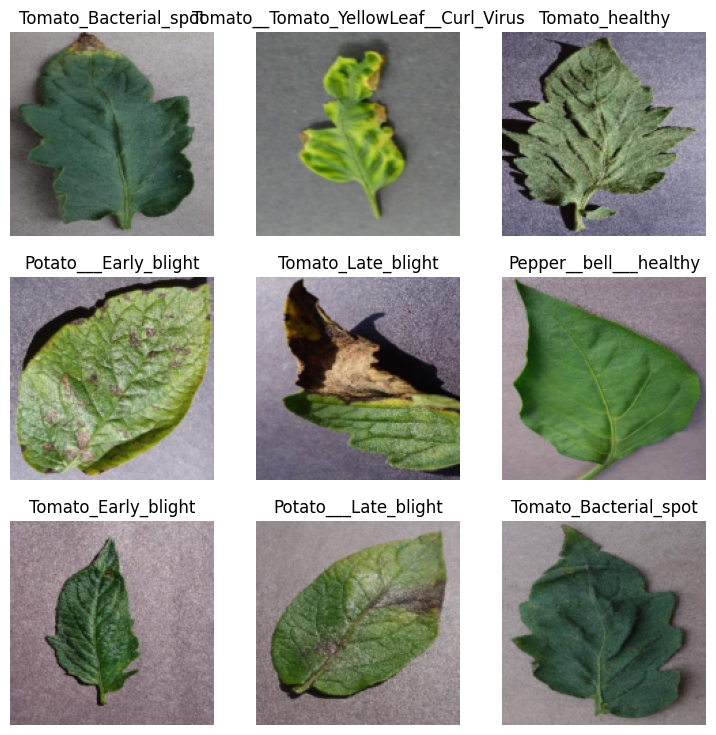

In [17]:
dls.show_batch()

In [18]:
learn=cnn_learner(dls,resnet34,metrics=[error_rate,accuracy])
learn.summary()

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 81.6MB/s]


Sequential (Input shape: 64 x 3 x 150 x 150)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 75 x 75   
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 38 x 38   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

In [19]:
learn.predict(files[0])

('Tomato_Bacterial_spot',
 tensor(5),
 tensor([3.8006e-05, 2.3416e-02, 1.5311e-02, 3.4550e-02, 4.3523e-03, 5.7939e-01,
         9.4865e-03, 5.8281e-02, 2.0522e-03, 3.0399e-02, 2.3406e-03, 8.0423e-03,
         1.2217e-03, 1.1737e-01, 1.1375e-01]))

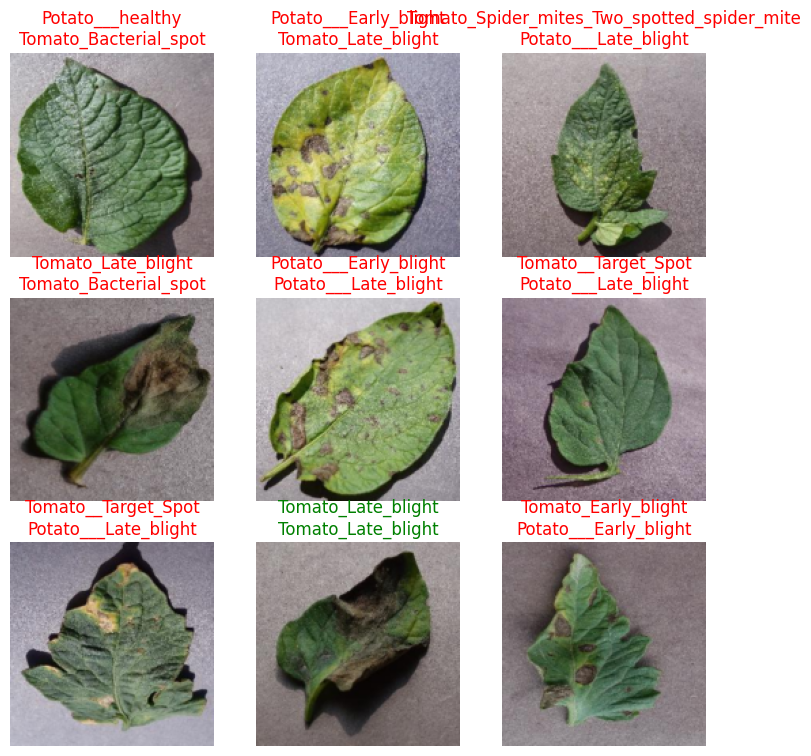

In [20]:
learn.show_results()

SuggestedLRs(valley=0.001737800776027143)

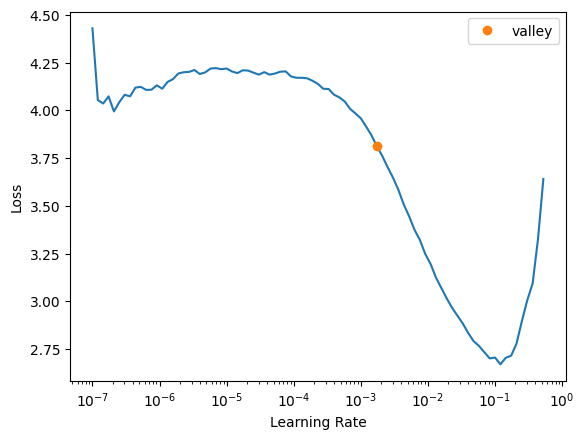

In [21]:
learn.lr_find()

In [22]:
learn.fine_tune(1,0.001)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.873671,0.412599,0.136903,0.863097,01:08


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.232951,0.130733,0.041919,0.958081,01:11


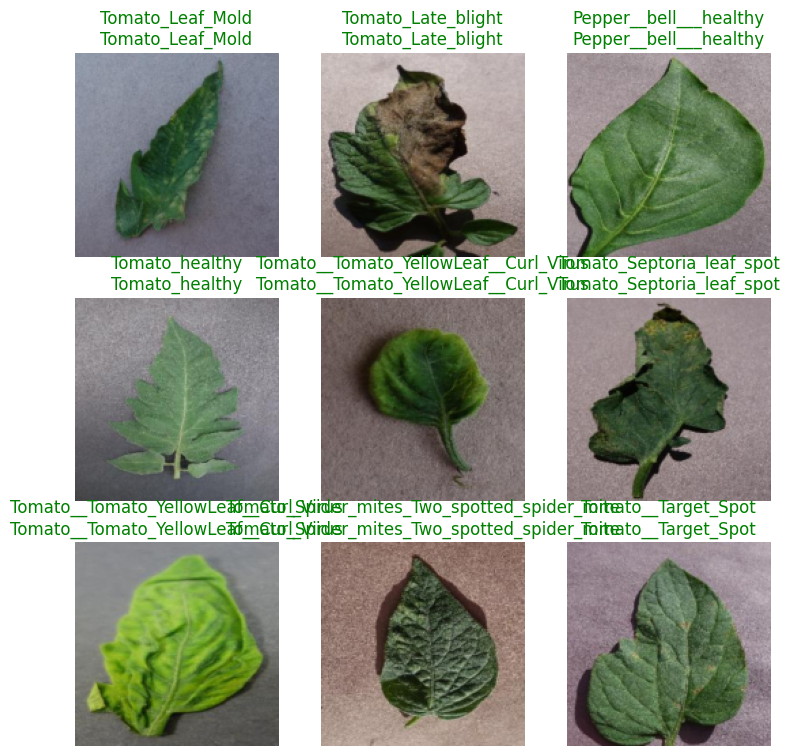

In [23]:
learn.show_results()

In [24]:
interp = Interpretation.from_learner(learn)

In [25]:
interp2=ClassificationInterpretation.from_learner(learn)

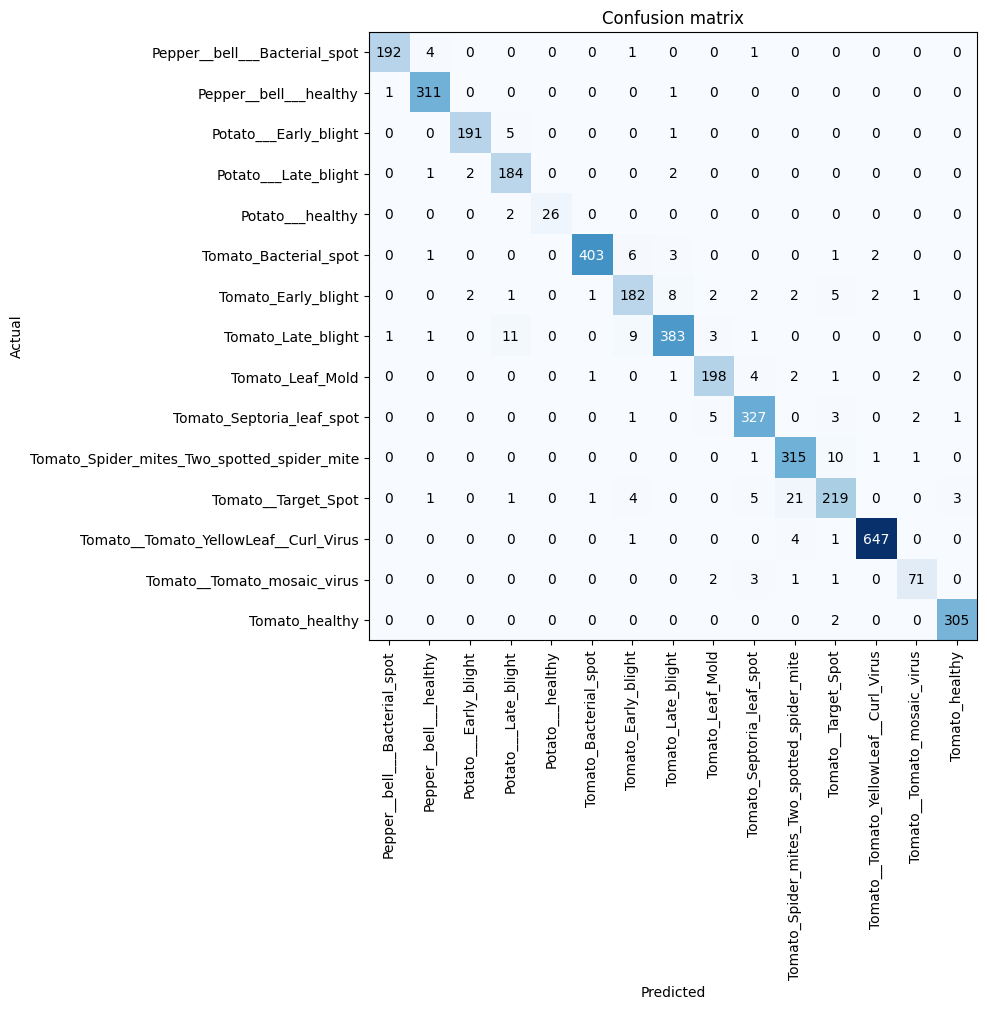

In [26]:
interp2.plot_confusion_matrix(figsize=(15,10))

In [27]:

learn.export('plant_disease_model.pkl')
